In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw (x1, x2):
    plt.plot(x1, x2)

def sigmoid(score):
    return (1/(1+np.exp(-score)))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    propabilities = sigmoid(points * line_parameters)
    cross_entry = -(1 / m) * (np.log(propabilities).T * y + np.log(1-propabilities).T * (y-1))
    return cross_entry

def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(5000):
        prop=sigmoid(points*line_parameters)
        gradient= (points.T * (prop - y)) * (alpha / m) 
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        C = line_parameters.item(2)

        X1 = np.array([points[:, 0].min(), points[:, 1].max()])
        X2 = -C /w2 + X1 * (- w1 / w2)
    
    draw(X1, X2)


In [3]:
numberOfpoints = 100
np.random.seed(0)
bias = np.ones(numberOfpoints)


random_x1_values = np.random.normal(10, 2, numberOfpoints) #start from 10, standard deviation = 2
random_y1_values = np.random.normal(12, 2, numberOfpoints)
random_x2_values = np.random.normal(5, 2, numberOfpoints) #start from 10, standard deviation = 2
random_y2_values = np.random.normal(6, 2, numberOfpoints)

top_region = np.array([random_x1_values, random_y1_values, bias]).transpose()
bottom_region = np.array([random_x2_values, random_y2_values, bias]).transpose()
all_points=np.vstack((top_region, bottom_region))

#The Equation is {w1(X1) + w2(X2) + C = 0}
# w1 = -0.2
# w2 = -0.35
# C = 3.5 #vertical axis intercept

line_parameters = np.matrix(np.matrix([np.zeros(3)])).transpose()
# X1 = np.array([bottom_region[:, 0].min(), top_region[:, 1].max()])
# X2 = -C /w2 + X1 * (- w1 / w2)
linear_combination = all_points * line_parameters

propabilities = sigmoid(linear_combination)
y = np.array([np.zeros(numberOfpoints), np.ones(numberOfpoints)]).reshape(numberOfpoints * 2, 1)


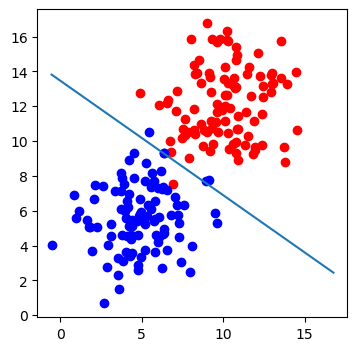

In [4]:
fig, ax =plt.subplots(figsize = (4, 4))  #allows multiple plots on the same figure
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)


plt.show()

In [5]:
print(calculate_error(line_parameters, all_points, y))

[[-7.10542736e-17]]
